# Исследование объявлений о продаже квартир

### Описание данных:  
-  total_images — число фотографий квартиры в объявлении
-  last_price — цена на момент снятия с публикации
-  total_area — площадь квартиры в квадратных метрах (м²)
-  first_day_exposition — дата публикации
-  rooms — число комнат
-  ceiling_height — высота потолков (м)
-  floors_total — всего этажей в доме
-  living_area — жилая площадь в квадратных метрах(м²)
-  floor — этаж
-  is_apartment — апартаменты (булев тип)
-  studio — квартира-студия (булев тип)
-  open_plan — свободная планировка (булев тип)
-  kitchen_area — площадь кухни в квадратных метрах (м²)
-  balcony — число балконов
-  locality_name — название населённого пункта
-  airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
-  cityCenters_nearest — расстояние до центра города (м)
-  parks_around3000 — число парков в радиусе 3 км
-  parks_nearest — расстояние до ближайшего парка (м)
-  ponds_around3000 — число водоёмов в радиусе 3 км
-  ponds_nearest — расстояние до ближайшего водоёма (м)
-  days_exposition — сколько дней было размещено объявление (от публикации до снятия)

### План работ:
1.  Первый взгляд на данные.
2.  Определение и заполнение пропусков
3.  замена типа данных.
4.  Обработка дубликатов.
5.  Посчёт и добавление в таблицу.
6.  Изучение параметров.
7.  Построение гистограммы для параметров.
8.  Выполниение заданий.
9.  Вывод.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
flats = pd.read_csv('datasets/real_estate_data.csv', sep='\t')

Проверим данные:

In [2]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видим, что есть пропуски в 14 столбцах из 22.  
  
Посмотрим на общий вид таблицы и данных:

In [3]:
flats.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Видно, что столбцы last_price, floors_total, balcony, parks_around3000, ponds_around3000 точно можно сделать типом данных int.

In [4]:
flats.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Из метода describe видно, что во многих столбцах, максимальные значения выбиваются из общих данных(до 75%).

### Вывод

Данные имеют очевидные изъяны. Пропуски, выбивающиеся из общей массы чрезмерно большие значения, неудобные типы данных.

### Шаг 2. Предобработка данных

#### Определение и заполнение пропусков

#### Рассмотрим сторлбец locality_name.

In [5]:
flats['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [6]:
flats['locality_name'].isna().sum()

49

В нём кончено есть пропуски, но их всего 49 штук, что не сильно исказит результат. Также не удастся вычислить неизвестный населённый пункт. Заполню пропуски выделяющимся словом unknown:

In [7]:
flats['locality_name'] = flats['locality_name'].fillna('unknown')
flats['locality_name'].isna().sum()

0

Значения имеют разный вид. Населенный пункты дублируются из-за лишних слов. Приведем их в порядок, откинув мешающие слова "посёлок", "деревня" и т.д, с помощью регулярных выражений:

In [8]:
for i in range(0, 4):
    flats.loc[:, 'locality_name'] = flats['locality_name'].str.replace('^[а-я][а-яё]+\s', '')

Создам переменную с названиями населённых пунктов. Она пригодится далее:

In [9]:
locality_name_unique = flats['locality_name'].unique()
locality_name_unique

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Теперь значения в столбце выглядят приемлемо.  
  
#### Далее рассмотрю столбец floors_total:

In [10]:
flats['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Заполним пропуски нулём, т.к. его нет в данных.

In [11]:
flats['floors_total'] = flats['floors_total'].fillna(0)
flats['floors_total'].describe()

count    23699.000000
mean        10.635090
std          6.616396
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Заполним пропуски медианой по населённому пункту. Пропуски скорее всего из-за ошибки базы, либо люди не знеают сколько этажей у них в доме. Создадим словарь, где ключ - населённый пункт, а значение - медиана количества этажей этого пункта:

In [12]:
dictinory_locality_name_floors_total = {}
for i in locality_name_unique:
    dictinory_locality_name_floors_total[i] = flats.query('locality_name == @i and floors_total != 0')['floors_total'].median()
print(dictinory_locality_name_floors_total)

{'Санкт-Петербург': 9.0, 'Шушары': 9.0, 'Янино-1': 12.0, 'Парголово': 25.0, 'Мурино': 19.0, 'Ломоносов': 5.0, 'Сертолово': 9.0, 'Петергоф': 5.0, 'Пушкин': 5.0, 'Кудрово': 18.0, 'Коммунар': 5.0, 'Колпино': 9.0, 'Красный Бор': 5.0, 'Гатчина': 5.0, 'Фёдоровское': 4.0, 'Выборг': 5.0, 'Кронштадт': 5.0, 'Кировск': 5.0, 'Новое Девяткино': 16.0, 'Металлострой': 9.0, 'Лебяжье': 5.0, 'Сиверский': 5.0, 'Молодцово': 5.0, 'Кузьмоловский': 5.0, 'Новая Ропша': 10.0, 'Павловск': 4.0, 'Пикколово': 3.0, 'Всеволожск': 9.0, 'Волхов': 5.0, 'Кингисепп': 5.0, 'Приозерск': 5.0, 'Сестрорецк': 5.0, 'Куттузи': 12.0, 'Аннино': 5.0, 'Ефимовский': 3.0, 'Плодовое': 2.0, 'Заклинье': 5.0, 'Торковичи': 5.0, 'Первомайское': 5.0, 'Красное Село': 6.0, 'Понтонный': 5.0, 'Сясьстрой': 5.0, 'Старая': 9.0, 'Лесколово': 5.0, 'Новый Свет': 5.0, 'Сланцы': 5.0, 'Путилово': 4.0, 'Ивангород': 5.0, 'Шлиссельбург': 5.0, 'Никольское': 9.0, 'Зеленогорск': 4.0, 'Сосновый Бор': 9.0, 'Оржицы': 5.0, 'Кальтино': 4.0, 'Романовка': 5.0, 'Бугры

Напишу функцию, которая изменит значения нуля в столбце floors_total на медианы населённых пунктов столбца locality_name:

In [13]:
def floors_nan(flats):
    floors_total = flats['floors_total']
    locality_name = flats['locality_name']
    for row in flats:
        if floors_total == 0:
            return dictinory_locality_name_floors_total[locality_name]
        else:
            return floors_total

Применим функцию к столбцу floors_total:

In [14]:
flats['floors_total'] = flats.apply(floors_nan, axis=1)

Посмотрим, есть ли нули в данных:

In [15]:
flats['floors_total'].describe()

count    23699.00000
mean        10.67007
std          6.58781
min          1.00000
25%          5.00000
50%          9.00000
75%         16.00000
max         60.00000
Name: floors_total, dtype: float64

#### Проверим пропуски в столбце is_apartment. Посмотрим, сколько значения True и False:

In [16]:
flats[flats['is_apartment'] == True]['is_apartment'].count()

50

In [17]:
flats[flats['is_apartment'] == False]['is_apartment'].count()

2725

Может быть, апартаменты построены в каком нибудь определённом районе:

In [18]:
flats[flats['is_apartment'] == True]['locality_name'].unique() 

array(['Петергоф', 'Санкт-Петербург', 'Всеволожск', 'Выборг',
       'Никольское', 'Колпино', 'Щеглово', 'Красное Село', 'Нижняя',
       'Зеленогорск'], dtype=object)

Нет, заполнить is_apartment чем - нибудь подходящим по смыслу не получится.  
Будем отталкиватся от того, что аппартаментов в СПБ аппартаментов очень мало, а в области их нет. Заполню пропуски значением False.

In [19]:
flats['is_apartment'].fillna(False, inplace=True)
flats['is_apartment'].unique() 

array([False,  True])

Пропуски скорее всего появились из-за анкеты, в которой нужно было ставить галочку в пункте аппартаменты. Т.к. нет галочки - значит нет значения.  
    
#### Рассмотрим столбец ceiling_height:

In [20]:
flats['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Заполним нулём, которого нет в значениях высоты потолка:

In [21]:
flats['ceiling_height'].fillna(0, inplace=True)

In [22]:
flats['ceiling_height'].describe()

count    23699.000000
mean         1.696182
std          1.672495
min          0.000000
25%          0.000000
50%          2.500000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Создадим словарь, где ключ - населённый пункт, а значение - медиана высоты потолков этого пункта.
Если значение - 0, заполним медианой всего датафрейма.

In [23]:
dictinory_locality_name_ceiling_height = {}
for i in locality_name_unique:
    dictinory_locality_name_ceiling_height[i] = flats.query('locality_name == @i')['ceiling_height'].median()
    if dictinory_locality_name_ceiling_height[i] == 0:
        dictinory_locality_name_ceiling_height[i] = flats['ceiling_height'].median()
print(dictinory_locality_name_ceiling_height)

{'Санкт-Петербург': 2.53, 'Шушары': 2.5, 'Янино-1': 2.5, 'Парголово': 2.5, 'Мурино': 2.5, 'Ломоносов': 2.5, 'Сертолово': 2.55, 'Петергоф': 2.51, 'Пушкин': 2.5, 'Кудрово': 2.5, 'Коммунар': 2.5, 'Колпино': 2.5, 'Красный Бор': 2.5, 'Гатчина': 2.5, 'Фёдоровское': 2.6, 'Выборг': 2.5, 'Кронштадт': 2.5, 'Кировск': 2.5, 'Новое Девяткино': 2.6, 'Металлострой': 2.5, 'Лебяжье': 2.5, 'Сиверский': 2.5, 'Молодцово': 2.5, 'Кузьмоловский': 2.5, 'Новая Ропша': 2.75, 'Павловск': 2.5, 'Пикколово': 2.5, 'Всеволожск': 2.6, 'Волхов': 2.5, 'Кингисепп': 2.5, 'Приозерск': 2.5, 'Сестрорецк': 2.55, 'Куттузи': 2.5, 'Аннино': 2.5, 'Ефимовский': 2.5, 'Плодовое': 2.5, 'Заклинье': 2.5, 'Торковичи': 2.5, 'Первомайское': 2.59, 'Красное Село': 2.5, 'Понтонный': 2.5, 'Сясьстрой': 2.5, 'Старая': 2.6, 'Лесколово': 2.59, 'Новый Свет': 2.575, 'Сланцы': 2.5, 'Путилово': 2.55, 'Ивангород': 2.5, 'Шлиссельбург': 2.5, 'Никольское': 2.5, 'Зеленогорск': 2.55, 'Сосновый Бор': 2.5, 'Оржицы': 2.5, 'Кальтино': 2.5, 'Романовка': 2.5, 'Б

Создадим функцию для заполнения пропусков в столбце ceiling_height:

In [24]:
def ceiling_height_nan(flats):
    ceiling_height = flats['ceiling_height']
    locality_name = flats['locality_name']
    for row in flats:
        if ceiling_height == 0:
            return dictinory_locality_name_ceiling_height[locality_name]
        else:
            return ceiling_height

Применим её на датафрейме:

In [25]:
flats['ceiling_height'] = flats.apply(ceiling_height_nan, axis=1)

In [26]:
flats['ceiling_height'].unique()

array([  2.7  ,   2.5  ,   2.53 ,   3.03 ,   2.67 ,   2.55 ,   2.56 ,
         3.05 ,   2.75 ,   2.6  ,   2.9  ,   2.8  ,   3.   ,   2.65 ,
         3.2  ,   2.61 ,   3.25 ,   3.45 ,   2.77 ,   2.85 ,   2.64 ,
         2.57 ,   4.15 ,   3.5  ,   3.3  ,   2.71 ,   4.   ,   2.47 ,
         2.73 ,   2.84 ,   3.1  ,   2.34 ,   3.4  ,   3.06 ,   2.72 ,
         2.54 ,   2.51 ,   2.78 ,   2.575,   2.76 ,  25.   ,   2.58 ,
         3.7  ,   2.52 ,   5.2  ,   2.87 ,   2.66 ,   2.59 ,   2.   ,
         2.45 ,   3.6  ,   2.92 ,   3.11 ,   1.25 ,   3.13 ,   3.8  ,
         3.15 ,   3.55 ,   3.16 ,   3.62 ,   3.12 ,   2.74 ,   2.96 ,
         2.46 ,   5.3  ,   5.   ,   2.79 ,   2.95 ,   4.06 ,   2.94 ,
         3.82 ,   3.54 ,   3.53 ,   2.475,   2.83 ,   4.7  ,   2.4  ,
         3.38 ,   3.01 ,   5.6  ,   3.65 ,   3.9  ,   3.18 ,   3.35 ,
         2.3  ,   3.57 ,   2.48 ,   2.62 ,   2.82 ,   3.98 ,   2.63 ,
         3.83 ,  13.5  ,   3.52 ,   3.95 ,   3.75 ,   2.88 ,   3.67 ,
         3.87 ,   3.

Пропусков и нулей больше нет. Возможно пропуски появились из-за того, что люди не знают высоту потолков. Часто в квартире натяжные или гипсокортоновые потолки, что не позволяет определить реальную высоту.  

#### Рассмотрим столбец living_area:

In [27]:
flats['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Заполним пропуски нулями, т.к. их нет в данных.

In [28]:
flats['living_area'].fillna(0, inplace=True)

In [29]:
flats['living_area'].describe()

count    23699.000000
mean        31.690930
std         23.109666
min          0.000000
25%         17.800000
50%         29.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

Пропуски заполнены.  
Выясним коэффициент отношения total_area к living_area по колличеству комнат. Для этого узнаю, уникальные значения комнат в DataFrame:

In [30]:
unique_rooms = flats['rooms'].unique()
print(unique_rooms)

[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]


Словарь с коэффициентами для living_area:

In [31]:
koef_dictinory_unique_rooms_living_area = {}
for i in unique_rooms:
    koef_dictinory_unique_rooms_living_area[i] = flats.query('rooms == @i')['total_area'].median() / flats.query('rooms == @i and living_area != 0')['living_area'].median()
print(koef_dictinory_unique_rooms_living_area)

{3: 1.6222222222222222, 1: 2.077272727272727, 2: 1.7377049180327868, 4: 1.561320754716981, 5: 1.5955766192733016, 6: 1.4874899112187248, 0: 1.4472222222222222, 7: 1.4758620689655173, 11: 1.4107542942494395, 8: 1.463975155279503, 14: 1.5588009223674095, 10: 1.6889714993804215, 15: 1.4425427872860637, 9: 1.6794084821428572, 19: 1.416257088846881, 16: 1.5, 12: 2.196729314132292}


Напишу и применю функцию для заполнения пропусков:

In [32]:
def living_area_nan(flats):
    rooms = flats['rooms']
    total_area = flats['total_area']
    living_area = flats['living_area']
    for row in flats:
        if living_area == 0:
            return koef_dictinory_unique_rooms_living_area[rooms] * total_area
        else:
            return living_area

In [33]:
flats['living_area'] = flats.apply(living_area_nan, axis=1)

In [34]:
flats['living_area'].describe()

count    23699.000000
mean        40.558504
std         35.434064
min          2.000000
25%         19.000000
50%         31.100000
75%         46.000000
max       1026.380455
Name: living_area, dtype: float64

In [35]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Пропуски заполнены.

#### Рассмотрим столбец kitchen_area:

In [36]:
flats['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Заполним пропуски нулями:

В данных, если значения комнат равно 0, присутсвует только nan площади кухни.

In [37]:
flats.query('rooms == 0')['kitchen_area'].unique()

array([nan])

In [38]:
flats['kitchen_area'].fillna(0, inplace=True)

In [39]:
flats['kitchen_area'].describe()

count    23699.000000
mean         9.553814
std          6.420973
min          0.000000
25%          6.300000
50%          9.000000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

Пропуски заполнены нулями.  
Используем словарь koef_dictinory_unique_rooms_kitchen_area, используя список unique_rooms для заполнения пропусков. Т.к. у нуля комнат есть только 0 площади кухни, писать словарь придется заполняя эту площядь общей медианой площади кухонь:  


In [40]:
koef_dictinory_unique_rooms_kitchen_area = {}
for i in unique_rooms:
    if flats.query('rooms == @i')['kitchen_area'].median() == 0:
        koef_dictinory_unique_rooms_kitchen_area[i] = flats['kitchen_area'].median()
    else:
        koef_dictinory_unique_rooms_kitchen_area[i] = flats.query('rooms == @i')['total_area'].median() / flats.query('rooms == @i')['kitchen_area'].median()
print(koef_dictinory_unique_rooms_kitchen_area)

{3: 8.11111111111111, 1: 4.062222222222222, 2: 6.385542168674698, 4: 9.457142857142857, 5: 10.170138888888888, 6: 9.855614973262034, 0: 9.0, 7: 11.88888888888889, 11: 14.992063492063489, 8: 10.203463203463203, 14: 14.315294117647058, 10: 13.767676767676768, 15: 5.9, 9: 21.887272727272727, 19: 13.572463768115941, 16: 20.76923076923077, 12: 8.035714285714286}


Напишу и применю функцию для заполнения пропусков:

In [41]:
def kitchen_area_nan(flats):
    rooms = flats['rooms']
    total_area = flats['total_area']
    kitchen_area = flats['kitchen_area']
    for row in flats:
        if kitchen_area == 0:
            return koef_dictinory_unique_rooms_kitchen_area[rooms] * total_area
        else:
            return kitchen_area

In [42]:
flats['kitchen_area'] = flats.apply(kitchen_area_nan, axis=1)

In [43]:
flats['kitchen_area'].describe()

count    23699.000000
mean        47.910141
std        176.996165
min          1.300000
25%          7.400000
50%         10.000000
75%         13.510000
max       5143.509091
Name: kitchen_area, dtype: float64

In [44]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Пропуски заполнены.  
#### Посмотрим на пропуски балконов:

In [45]:
flats_fillna_balcony = flats.copy()
flats_fillna_balcony['balcony'].fillna(999, inplace=True)
balcon_nan = flats_fillna_balcony.query('balcony == 999')
display(balcon_nan)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.000000,999.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.000000,999.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.50,12.0,14.40,5,False,...,9.100000,999.0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.50,27.0,15.43,26,False,...,8.810000,999.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,False,...,8.500000,999.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.50,5.0,17.50,4,False,...,6.000000,999.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,False,...,13.830000,999.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.00,4,False,...,8.500000,999.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.50,3.0,29.70,1,False,...,362.060241,999.0,Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
flats_fillna_balcony.query('balcony == 999').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,11519.000000,1.151900e+04,11519.000000,11519.000000,11519.000000,11519.000000,11519.000000,11519.000000,11519.000000,11519.0,8802.000000,8809.000000,8809.000000,4117.000000,8809.000000,4530.000000,9409.000000
mean,10.063113,6.714214e+06,61.331316,2.117719,2.671432,9.989669,44.177504,5.314003,62.014169,999.0,28590.991593,13643.846521,0.655580,489.176342,0.804972,511.330684,184.699649
std,5.671654,1.032574e+07,37.589691,1.119232,0.624853,6.460962,38.381603,4.667232,194.652987,0.0,12273.637692,8813.802627,0.829124,339.094777,0.960325,279.571445,233.909024
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,999.0,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,20.000000,2.000000,7.300000,999.0,19062.750000,8059.000000,0.000000,288.000000,0.000000,280.000000,45.000000
50%,10.000000,4.700000e+06,52.000000,2.000000,2.530000,9.000000,32.800000,4.000000,10.000000,999.0,26191.000000,12548.000000,0.000000,448.000000,1.000000,494.500000,93.000000
75%,14.000000,7.050000e+06,71.000000,3.000000,2.700000,14.000000,51.000000,7.000000,15.000000,999.0,36779.000000,16057.000000,1.000000,611.000000,1.000000,719.750000,230.000000
max,50.000000,4.200000e+08,900.000000,19.000000,32.000000,60.000000,931.268966,31.000000,5143.509091,999.0,84665.000000,65764.000000,3.000000,3190.000000,3.000000,1344.000000,1553.000000


Очень странно, что 11519 квартир из 23699 без балконов! Квартиры без балконов в СПБ не слишком частое явление.

In [47]:
flats_fillna_balcony['balcony'].unique()

array([999.,   2.,   0.,   1.,   5.,   4.,   3.])

In [48]:
flats_fillna_balcony.query('balcony == 5')['rooms'].describe()

count    304.000000
mean       2.697368
std        0.871549
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        7.000000
Name: rooms, dtype: float64

Не знаю, что можно сделать с квартирами, у которых количество балконов превышает количество комнат. 
Однако, задание предлагает заполнить пропуски балконов нулямии:  
"для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0."  
Заполню пропуски балконов нулями:

In [49]:
flats['balcony'].fillna(0, inplace=True)
flats['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

In [50]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Остаьные пропуски можно заполнить отрицательными значениями:

In [51]:
flats.query('airports_nearest < 0')['airports_nearest'].count()

0

In [52]:
flats['airports_nearest'].fillna(-1, inplace=True)

In [53]:
flats.query('cityCenters_nearest < 0')['cityCenters_nearest'].count()

0

In [54]:
flats['cityCenters_nearest'].fillna(-1, inplace=True)

In [55]:
flats.query('parks_around3000 < 0')['parks_around3000'].count()

0

In [56]:
flats['parks_around3000'].fillna(-1, inplace=True)

In [57]:
flats.query('parks_nearest < 0')['parks_nearest'].count()

0

In [58]:
flats['parks_nearest'].fillna(-1, inplace=True)

In [59]:
flats.query('ponds_around3000 < 0')['ponds_around3000'].count()

0

In [60]:
flats['ponds_around3000'].fillna(-1, inplace=True)

In [61]:
flats.query('ponds_nearest < 0')['ponds_nearest'].count()

0

In [62]:
flats['ponds_nearest'].fillna(-1, inplace=True)

In [63]:
flats.query('days_exposition < 0')['days_exposition'].count()

0

In [64]:
flats['days_exposition'].fillna(-1, inplace=True)

In [65]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

#### Вывод:  
Все возможные пропускы заполнены. Пропуски по расстоянию заполнить невозможно. Вероятно, отсутсвие данных в этих столбцах связанго с тем, что заполнение и не имело смысла из-за слишком большого расстояния, логически не влияющего на цену квартиры. Данные последнего дня, вероятно не заполнены потому, что квартира еще не продана, либо люди забыли убрать объявление о продаже.

#### Замена типа данных

Данные в столбцах last_price, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, floors_total? balcony, нужно представить в формате данных (int), т.к. он занимает меньше места в памяти.

In [66]:
flats['last_price'] = flats['last_price'].astype('int')

In [67]:
flats['airports_nearest'] = flats['airports_nearest'].astype('int')

In [68]:
flats['cityCenters_nearest'] = flats['cityCenters_nearest'].astype('int')

In [69]:
flats['parks_around3000'] = flats['parks_around3000'].astype('int')

In [70]:
flats['parks_nearest'] = flats['parks_nearest'].astype('int')

In [71]:
flats['parks_nearest'] = flats['parks_nearest'].astype('int')

In [72]:
flats['ponds_around3000'] = flats['ponds_around3000'].astype('int')

In [73]:
flats['ponds_nearest'] = flats['ponds_nearest'].astype('int')

In [74]:
flats['days_exposition'] = flats['days_exposition'].astype('int')

In [75]:
flats['floors_total'] = flats['floors_total'].astype('int')

In [76]:
flats['balcony'] = flats['balcony'].astype('int')

В столбце first_day_exposition заменим тип данных на datetime:

In [77]:
flats['first_day_exposition']

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23699, dtype: object

In [78]:
flats['first_day_exposition'] = pd.to_datetime(flats['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [79]:
flats['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [80]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Проверим на наличие дубликатов:

In [81]:
flats.duplicated().sum()

0

Дубликатов не обнаружено.

#### Вывод

Все столбцы по возможности заполнены и вынесены в отдельные столбцы для  дальнейшей работы и возможности сравнения и отсеивания выбросов. Заменены типы данных на оптимальные.

### Шаг 3. Посчитайте и добавьте в таблицу

Посчитаем цены за квадратный метр и создадим отдельный столбец:

In [82]:
flats['price_metr'] = flats['last_price'] / flats['total_area']

In [83]:
flats['price_metr'] = flats['price_metr'].astype(int)

In [84]:
flats.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,0,Санкт-Петербург,18863,16028,1,482,2,755,-1,120370
1,7,3350000,40.4,2018-12-04,1,2.50,11,18.600000,1,False,...,2,Шушары,12817,18603,0,-1,0,-1,81,82920
2,10,5196000,56.0,2015-08-20,2,2.53,5,34.300000,4,False,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785
3,0,64900000,159.0,2015-07-24,3,2.53,14,257.933333,9,False,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000


Добавим день недели, месяц и год публикации объявления в таблицу новыми столбцами:

In [85]:
flats['weekday_exposition'] = flats['first_day_exposition'].dt.weekday

In [86]:
flats['month_exposition'] = flats['first_day_exposition'].dt.month

In [87]:
flats['year_exposition'] = flats['first_day_exposition'].dt.year

In [88]:
flats[['first_day_exposition', 'weekday_exposition', 'month_exposition', 'year_exposition']]

,first_day_exposition,weekday_exposition,month_exposition,year_exposition
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018
...,...,...,...,...
23694,2017-03-21,1,3,2017
23695,2018-01-15,0,1,2018
23696,2018-02-11,6,2,2018
23697,2017-03-28,1,3,2017


Добавим в таблицу столбец с разбивкой по этажам(первый, последний, другой). Для этого напишем функцию и применим её:

In [89]:
def floor_split(flats):
    floor = flats['floor']
    floors_total = flats['floors_total']
    for row in flats:
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        else:
            return 'другой'            

In [90]:
flats['floor_category'] = flats.apply(floor_split, axis=1)

In [91]:
flats['floor_category']

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: floor_category, Length: 23699, dtype: object

Посчитаем и добавим в таблицу соотношение жилой и общей площади:

In [92]:
flats['living_total_area'] = flats['living_area'] / flats['total_area']

In [93]:
flats['living_total_area']

0        0.472222
1        0.460396
2        0.612500
3        1.622222
4        0.320000
           ...   
23694    0.547792
23695    0.644068
23696    0.523810
23697    1.737705
23698    0.380805
Name: living_total_area, Length: 23699, dtype: float64

Посчитаем и добавим в таблицу соотношение отношение площади кухни к общей:

In [94]:
flats['kitchen_total_area'] = flats['kitchen_area'] / flats['total_area']

In [95]:
flats['kitchen_total_area']

0        0.231481
1        0.272277
2        0.148214
3        8.111111
4        0.410000
           ...   
23694    0.103356
23695    0.144068
23696    6.385542
23697    0.303583
23698    0.278638
Name: kitchen_total_area, Length: 23699, dtype: float64

In [96]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [97]:
flats.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday_exposition,month_exposition,year_exposition,floor_category,living_total_area,kitchen_total_area
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755,-1,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.50,11,18.600000,1,False,...,0,-1,81,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.53,5,34.300000,4,False,...,2,574,558,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.53,14,257.933333,9,False,...,3,234,424,408176,4,7,2015,другой,1.622222,8.111111
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48,121,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.50,12,14.400000,5,False,...,-1,-1,55,95065,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,2.50,26,10.600000,6,False,...,0,-1,155,99195,3,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,2.53,24,124.419672,22,False,...,0,-1,-1,110544,3,4,2019,другой,1.737705,0.263966
8,20,2900000,33.16,2018-05-23,1,2.50,27,15.430000,26,False,...,-1,-1,189,87454,2,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,0,-1,289,88524,6,2,2017,другой,0.714754,0.106557


#### Вывод

Данные полготовлены для исследовательского анализа.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Посмотрим на столбцамы площадь, цена, число комнат, высота потолков:

In [98]:
flats[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,23699.000000
mean,60.348651,6.541549e+06,2.070636,2.672139
std,35.654083,1.088701e+07,1.078405,0.998819
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.500000
50%,52.000000,4.650000e+06,2.000000,2.530000
75%,69.900000,6.800000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


Изучим общие площади квартир:

В четвёртой квантили есть определённо выбивающиеся значения. Квартира площадью 900 метров явно выброс.  
Изучим цены, для удобства восприятия, запишим их в миллионах:

In [99]:
flats['last_price'] = flats['last_price'] / 1000000

In [100]:
flats[['total_area', 'last_price', 'rooms', 'ceiling_height']]

,total_area,last_price,rooms,ceiling_height
0,108.00,13.000,3,2.70
1,40.40,3.350,1,2.50
2,56.00,5.196,2,2.53
3,159.00,64.900,3,2.53
4,100.00,10.000,2,3.03
...,...,...,...,...
23694,133.81,9.700,3,3.70
23695,59.00,3.100,3,2.50
23696,56.70,2.500,2,2.50
23697,76.75,11.475,2,3.00


В ценах тоже видны странные суммы. Цена на квартиру 763 миллиона и 12 тысяч кажутся странными.  
Рассмотрим число комнат:

In [101]:
flats[['total_area', 'last_price', 'rooms', 'ceiling_height']].query('rooms == 0').describe()

,total_area,last_price,rooms,ceiling_height
count,197.000000,197.000000,197.0,197.000000
mean,29.279746,3.337724,0.0,2.761523
std,25.855264,5.046022,0.0,1.759202
min,15.500000,0.945750,0.0,2.500000
25%,24.050000,2.300000,0.0,2.500000
50%,26.050000,2.700000,0.0,2.530000
75%,28.400000,3.380000,0.0,2.700000
max,371.000000,71.000000,0.0,27.000000


Подозрительнго выглядят 19 комнат. С количеством комнат 0, дела обстаят сложнее, возможно это квартиры студии. Но в нимх скорее площадь кухни ровнялась бы нулю.  
Рассмотрим высоту потолков:

In [102]:
flats['ceiling_height'].describe()

count    23699.000000
mean         2.672139
std          0.998819
min          1.000000
25%          2.500000
50%          2.530000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Здесь выделяются значения 100 и 1.

Построим гистаграмму и диаграмму размаха площади, цены, числа комнат, высоты потолков. Для этого создадим таблицу с этими столбцами:

In [103]:
flats_research_analysis = flats.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']]

In [104]:
import matplotlib.pyplot as plt

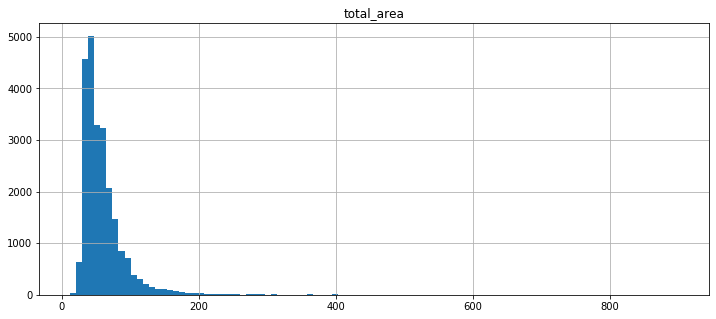

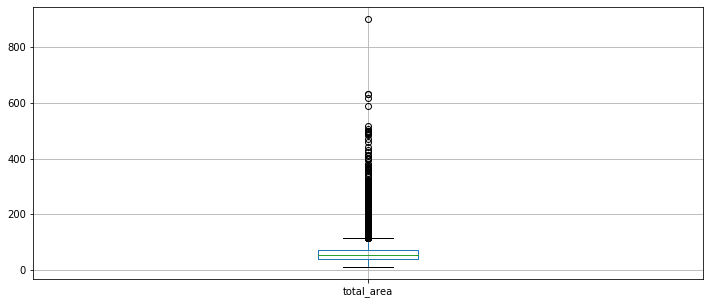

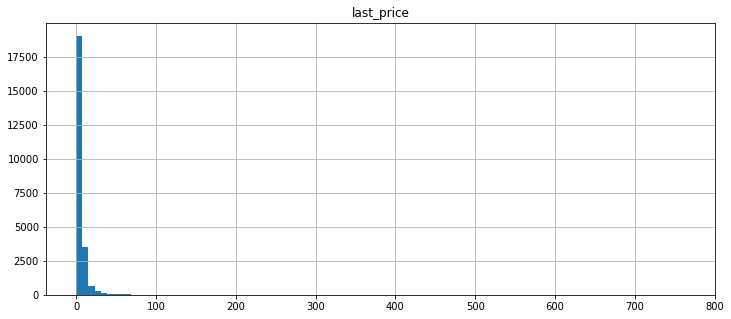

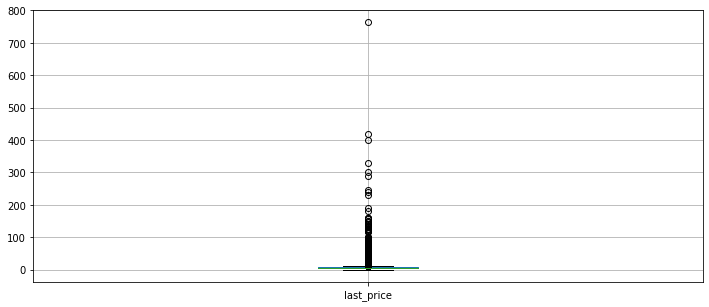

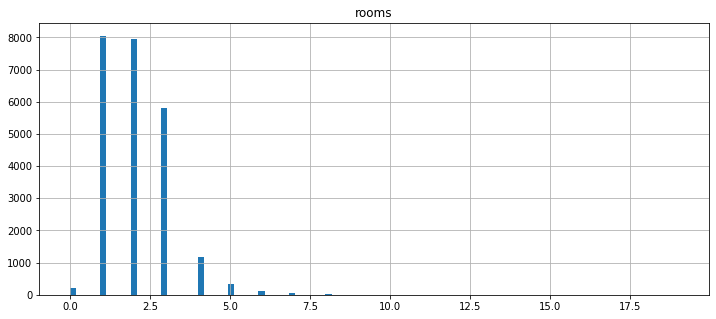

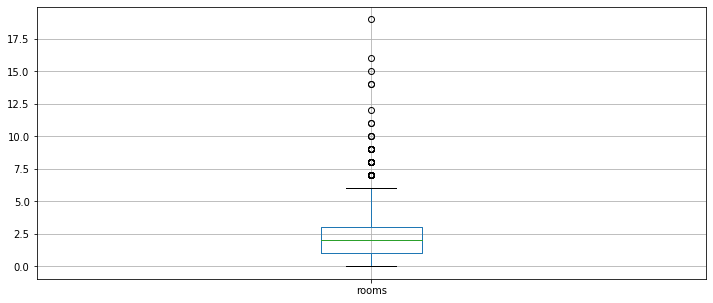

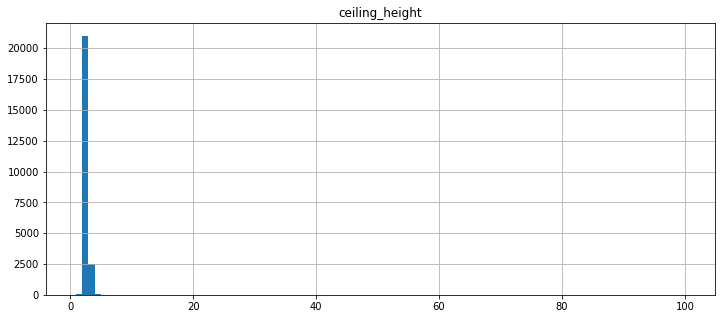

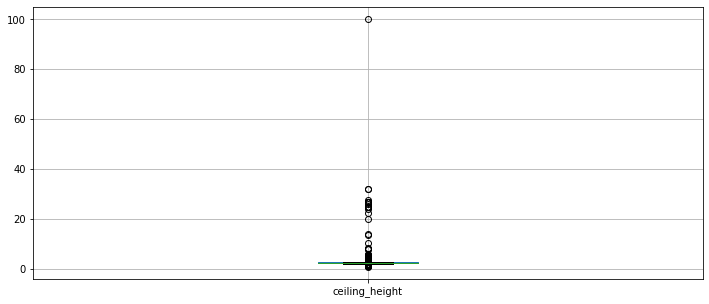

In [105]:
for i in flats_research_analysis:
    flats_research_analysis.hist(i, bins=100, figsize=(12, 5))
    plt.show()
    flats_research_analysis.boxplot(i, figsize=(12, 5))

Изучим время продажи квартиры:

In [106]:
flats['days_exposition'].describe()

count    23699.000000
mean       156.474619
std        213.645563
min         -1.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Подозрительны продажи квартир за очень маленькое колличество дней.  
Построим гистограмму:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C2E6C88>]],
      dtype=object)

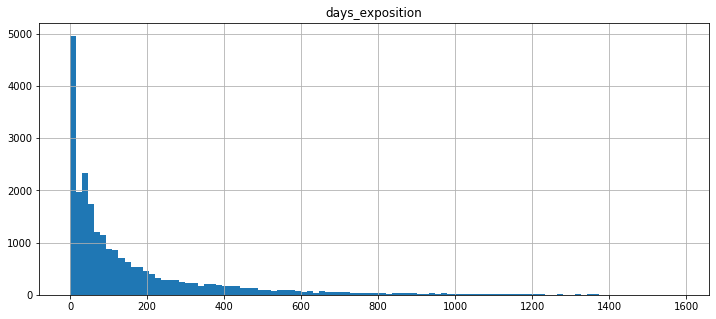

In [107]:
flats.hist('days_exposition', bins=100, figsize=(12, 5))

Посчитаем среднее и медианное значение продажи квартир:

In [108]:
flats['days_exposition'].mean()

156.47461918224397

In [109]:
flats['days_exposition'].median()

74.0

Построим диаграмму размаха:

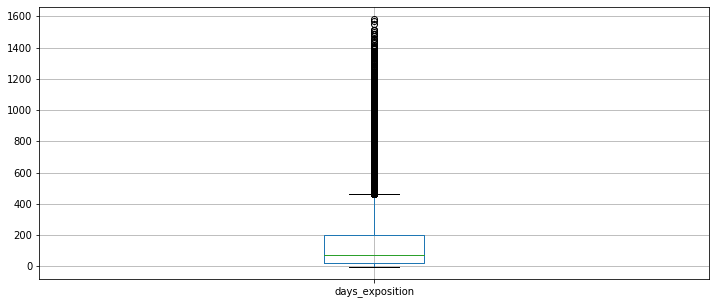

In [110]:
flats.boxplot('days_exposition', figsize=(12, 5))

Уберём выбивающиеся значения. Хвост с помощью размаха. На мой взгляд, продать квартиру мене, чем за месяц не представляется возможным. Выкинем значения, менее 30 дней.

In [111]:
Q1_dyas = flats['days_exposition'].quantile(0.25)
Q3_days = flats['days_exposition'].quantile(0.75)
IQR_days = Q3_days - Q1_dyas
flats = flats.query('30 <= days_exposition <= (@Q3_days + 1.5 * @IQR_days) and days_exposition > -1')

In [112]:
flats['days_exposition'].describe()

count    14966.000000
mean       147.143058
std        110.314650
min         30.000000
25%         60.000000
50%        109.000000
75%        204.000000
max        464.000000
Name: days_exposition, dtype: float64

In [113]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14966 entries, 1 to 23695
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          14966 non-null  int64         
 1   last_price            14966 non-null  float64       
 2   total_area            14966 non-null  float64       
 3   first_day_exposition  14966 non-null  datetime64[ns]
 4   rooms                 14966 non-null  int64         
 5   ceiling_height        14966 non-null  float64       
 6   floors_total          14966 non-null  int32         
 7   living_area           14966 non-null  float64       
 8   floor                 14966 non-null  int64         
 9   is_apartment          14966 non-null  bool          
 10  studio                14966 non-null  bool          
 11  open_plan             14966 non-null  bool          
 12  kitchen_area          14966 non-null  float64       
 13  balcony         

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C2AFA88>]],
      dtype=object)

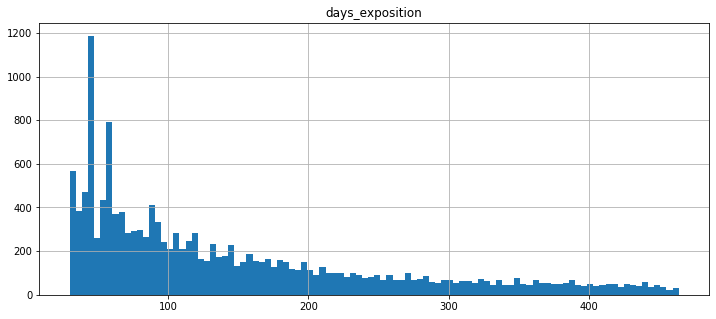

In [114]:
flats.hist('days_exposition', bins=100, figsize=(12, 5))

In [115]:
flats['days_exposition'].describe()

count    14966.000000
mean       147.143058
std        110.314650
min         30.000000
25%         60.000000
50%        109.000000
75%        204.000000
max        464.000000
Name: days_exposition, dtype: float64

Внимательнее посмотрим на пики:

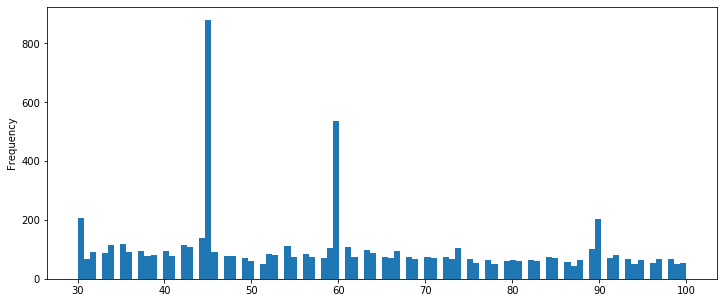

In [116]:
flats['days_exposition'].plot(range=(30, 100), bins=100, figsize=(12, 5), kind='hist')

Получилось, что в среднем квартиру продают за 4 - 6 месяца. Видны пики в значениях 30, 45, 60 и 90 дней. Необычно быстрые продажи - менее месяца. Необычно долгие - более 550 дней.  
Уберём выбивающиеся значения из площади, цены, числа комнат, высоты потолков:

In [117]:
Q1 = flats_research_analysis.quantile(0.25)
Q3 = flats_research_analysis.quantile(0.75)
IQR = Q3 - Q1
data_flats = flats_research_analysis.query('(@Q1 - 1.5 * @IQR) <= @flats_research_analysis <= (@Q3 + 1.5 * @IQR)')

In [118]:
data_flats.describe()

,total_area,last_price,rooms,ceiling_height
count,22459.000000,21638.000000,23609.000000,22101.000000
mean,54.364907,4.839970,2.047905,2.599627
std,19.385325,2.217341,1.006772,0.134675
min,12.000000,0.012190,0.000000,2.200000
25%,39.400000,3.300000,1.000000,2.500000
50%,50.100000,4.400000,2.000000,2.530000
75%,65.600000,6.000000,3.000000,2.650000
max,114.600000,11.894400,6.000000,3.000000


Странное значение цен осталось. Обрежем его вручную запросом query:

In [119]:
good_data_flats = data_flats.query('last_price > 0.013')
good_data_flats.describe()

,total_area,last_price,rooms,ceiling_height
count,21458.000000,21637.000000,21636.000000,20634.000000
mean,52.620209,4.840193,1.929839,2.591979
std,17.724852,2.217149,0.911460,0.126254
min,12.000000,0.430000,0.000000,2.200000
25%,39.000000,3.300000,1.000000,2.500000
50%,49.000000,4.400000,2.000000,2.530000
75%,63.000000,6.000000,3.000000,2.650000
max,114.500000,11.894400,6.000000,3.000000


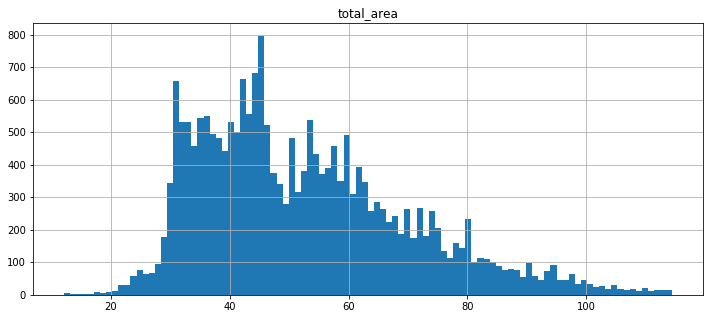

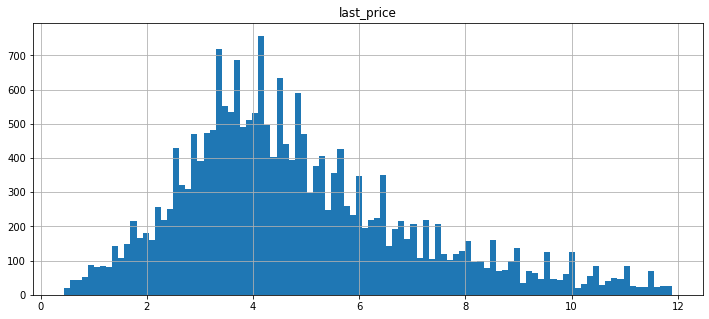

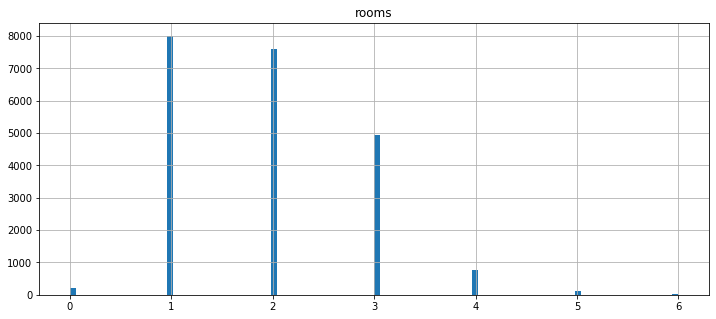

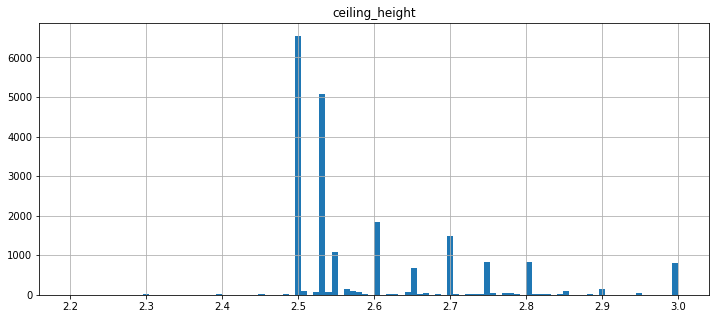

In [120]:
for i in good_data_flats:
    good_data_flats.hist(i, bins=100, figsize=(12, 5))    

Из графиков видно:  
-  Самые распространённые плащади квартир - примерно от 27 до 82 метров.
-  цены от 2.2 до 6.5 миллионов.
-  число комнат от 1 до 3
-  высота потолков от 2.49 до 2.81 местра.

Внесём изменения в основную таблицу:

In [121]:
flats = flats.query('12 <= total_area <= 114.5 and 0.43 <= last_price <= 11.8944 and 2.2 <= ceiling_height <= 3')

In [122]:
flats[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,13244.000000,13244.000000,13244.000000,13244.000000
mean,51.601653,4.620886,1.870281,2.588052
std,16.954317,2.067734,0.864144,0.123092
min,12.000000,0.430000,0.000000,2.200000
25%,38.400000,3.236191,1.000000,2.500000
50%,47.850000,4.250000,2.000000,2.530000
75%,62.000000,5.650000,2.000000,2.602500
max,114.300000,11.880000,6.000000,3.000000


In [123]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13244 entries, 1 to 23695
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          13244 non-null  int64         
 1   last_price            13244 non-null  float64       
 2   total_area            13244 non-null  float64       
 3   first_day_exposition  13244 non-null  datetime64[ns]
 4   rooms                 13244 non-null  int64         
 5   ceiling_height        13244 non-null  float64       
 6   floors_total          13244 non-null  int32         
 7   living_area           13244 non-null  float64       
 8   floor                 13244 non-null  int64         
 9   is_apartment          13244 non-null  bool          
 10  studio                13244 non-null  bool          
 11  open_plan             13244 non-null  bool          
 12  kitchen_area          13244 non-null  float64       
 13  balcony         

Изучим зависимотсть цены от квадратных метров, числа комнат, удалённости от центра, на каком этаже расположена квартира(первый, дроугой, последний), и от даты размещения: 

Посмотрим на зависимость от площади:

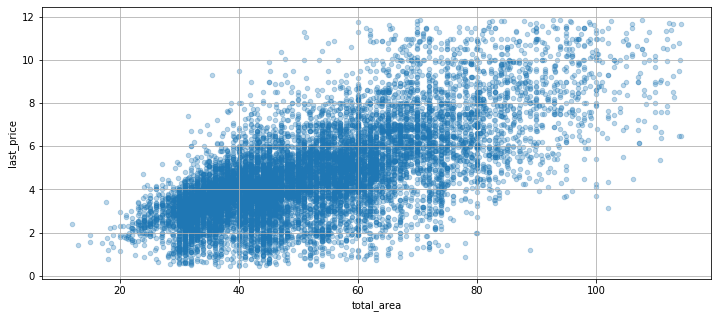

In [124]:
flats.plot(x='total_area', y='last_price', kind='scatter', grid=True, figsize=(12, 5), alpha=0.3)

Посчитаем коэффициент корреляции:

In [125]:
flats['last_price'].corr(flats['total_area'])

0.6902932706719371

Коэффициент почти 0.7. Это говорит о достаточно сильной зависимости.

Прослеживается зависимость - чем больше плащадь - тем больше цена. Но ширина фигуры широкая, зависимость на мой взгляд не строгая. Можно сказать, проходит две параллельные прямые, цены разбросаны между ними.  

Посмотрим на зависимость от числа комнат:

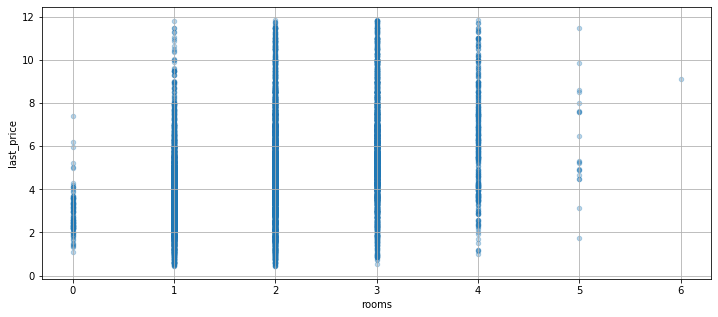

In [126]:
flats.plot(x='rooms', y='last_price', kind='scatter', grid=True, figsize=(12, 5), alpha=0.3)

Посчитаем коэффициент корреляции:

In [127]:
flats['last_price'].corr(flats['rooms'])

0.4195294368796038

Коэффициент 0.42 говорит о средней зависимисти.

Здесь тоже есть завсимость. Квартиры с 0 комнатами редко стоят более 4.1 миллиона. 4-ёх комнатные рже стоят менее двух миллионов.

Посмотрим на зависимость от категории этажа:

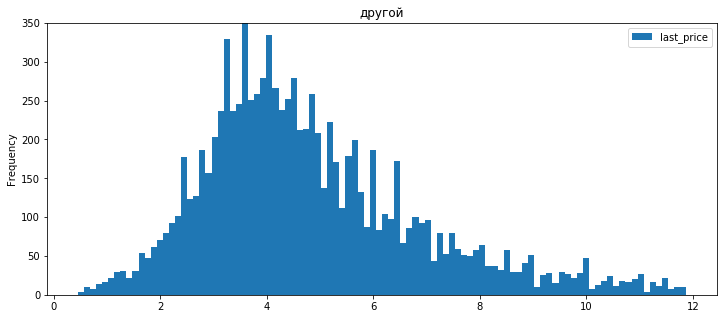

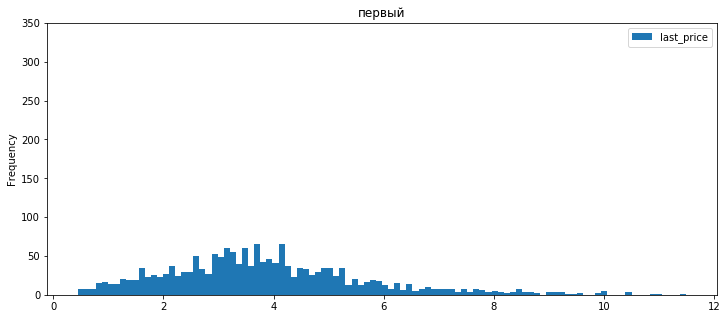

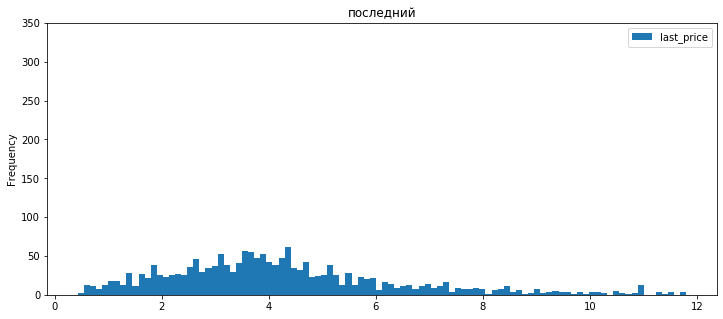

In [128]:
for floor, group_data in flats.groupby('floor_category'):
    group_data.plot(ylim=(0, 350), kind='hist', bins=100, y='last_price', title=floor, figsize=(12, 5))

In [129]:
flats.groupby('floor_category')['last_price'].describe()

,count,mean,std,min,25%,50%,75%,max
floor_category,,,,,,,,
другой,9775.0,4.829541,2.052116,0.45,3.400,4.40,5.90,11.88
первый,1722.0,3.852170,1.818105,0.44,2.625,3.65,4.83,11.50
последний,1747.0,4.211114,2.145269,0.43,2.750,3.90,5.20,11.80


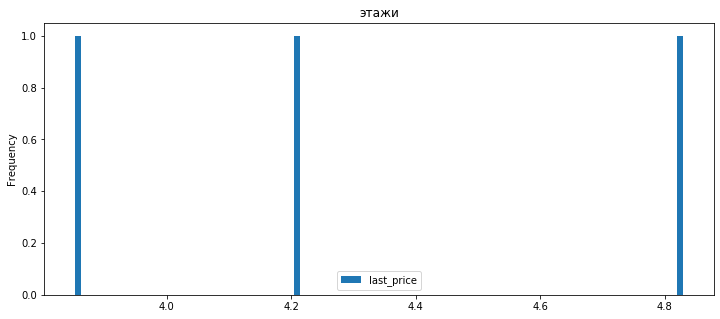

In [130]:
flats.pivot_table(index='floor_category', values='last_price').plot(kind='hist', bins=100, y='last_price', title='этажи', figsize=(12, 5))

Попробуем посчитать коэффициенты корреляции для каждый категории квартир:

In [131]:
floor_category_first = flats.query('floor_category == "первый"')
floor_category_first['last_price'].corr(floor_category_first['floor'])

nan

In [132]:
flats.query('floor_category == "первый"')['last_price'].median()

3.65

In [133]:
floor_category_other = flats.query('floor_category == "другой"')
floor_category_other['last_price'].corr(floor_category_other['floor'])

0.11527817678471781

In [134]:
floor_category_last = flats.query('floor_category == "последний"')
floor_category_last['last_price'].corr(floor_category_last['floor'])

0.23971436303633237

Коэффициенты корреляции говорят, что слабая зависимость есть. Только квартиры на 1-ом этаже выдали nan. Из медианы и средней цены видно, что они в любом случае самые дешёвые.

Из грвфиков видно, что квартиры на первом эатаже - стоят дешевле всего. На  последнем в среднем на 400 тысяч дороже. Спросом пользуются остальные этажи, соответственно и цена на них выше.

Рассмотрим зависимость цен от удалённости от центра:

In [135]:
flats.query('cityCenters_nearest > -1')['cityCenters_nearest'].describe()

count     9761.000000
mean     15504.423625
std       8289.083788
min        467.000000
25%      11163.000000
50%      13958.000000
75%      16958.000000
max      64857.000000
Name: cityCenters_nearest, dtype: float64

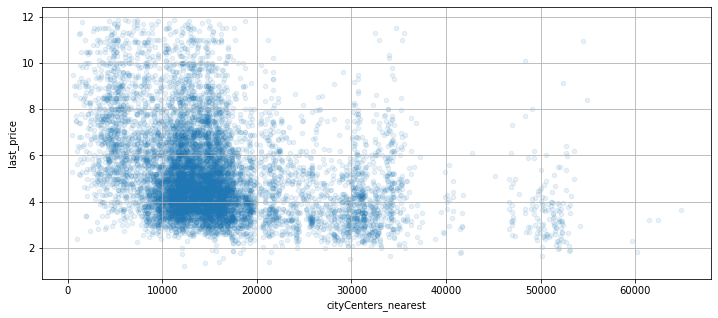

In [136]:
flats.query('cityCenters_nearest > -1').plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True, alpha=0.1, figsize=(12, 5))

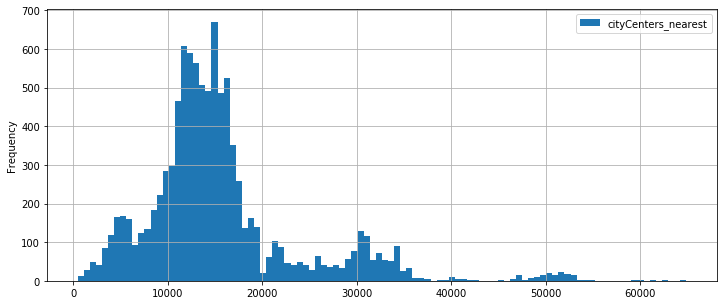

In [137]:
flats.query('cityCenters_nearest > -1').plot(y='cityCenters_nearest', x='last_price', kind='hist', bins=100, grid=True, figsize=(12, 5))

Посмотрим на коэффициент корреляции:

In [138]:
cityCenters_nearest_corr = flats.query('cityCenters_nearest > -1')
cityCenters_nearest_corr['last_price'].corr(cityCenters_nearest_corr['cityCenters_nearest'])

-0.3183861376498209

Из отрицательного коэффициента корреляции видно, что с есть отрицательная зависимость, т.е. с увеличением расстояния, падает цена.

Заметно, что самые дороги квартиры располагаются от 2 до 17 километров от центра. Самое больше количество квартир - от 8 до 20 километров.  
Рассморим зависимости от дня недели, месяца и года:

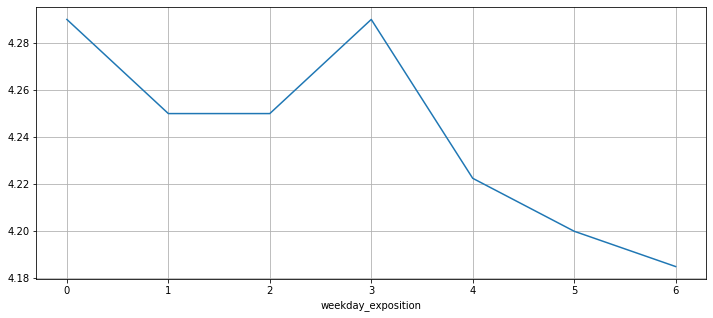

In [139]:
plt.figure()
flats.groupby('weekday_exposition')['last_price'].median().plot(x='weekday_exposition', y='last_price', grid=True, figsize=(12,5))

Посмотрим на коэффициент корреляции:

In [140]:
weekday_corr_list = []
for i in range(0, 7):
    weekday_exposition_corr = flats.query('weekday_exposition == @i')
    weekday_corr_list.append(weekday_exposition_corr['last_price'].corr(weekday_exposition_corr['weekday_exposition']))
weekday_corr_list

[nan, nan, nan, nan, nan, nan, nan]

In [141]:
weekday_exposition_corr1 = flats.query('weekday_exposition == 1')
weekday_exposition_corr1['last_price'].corr(weekday_exposition_corr['weekday_exposition'])

nan

In [142]:
flats['last_price'].corr(flats['weekday_exposition'])

-0.00859830387591368

Коэффициент корреляции слишком мал. Либо зависимости нет, либо зависимость сложная.  

По графику видно, что в понедельник и среду выставлены самые дороги квартиры. с четверга цена падает.  
Рассмотрим зависимость от месяца:

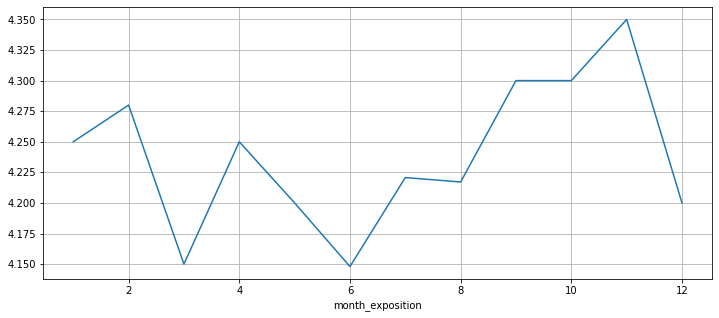

In [143]:
plt.figure()
flats.groupby('month_exposition')['last_price'].median().plot(x='month_exposition', y='last_price', grid=True, figsize=(12,5))

Посмотрим на коэффициент корреляции:

In [144]:
flats['last_price'].corr(flats['month_exposition'])

0.012783253175735889

Коэффициент также очень маленький. Или нет зависимости, или она сложная.

Из графика можно сделать вывод, что наибольшие цены - в ноябре. В марте и июне цены самые маленькие.  

Рассмотрим зависимость от года:

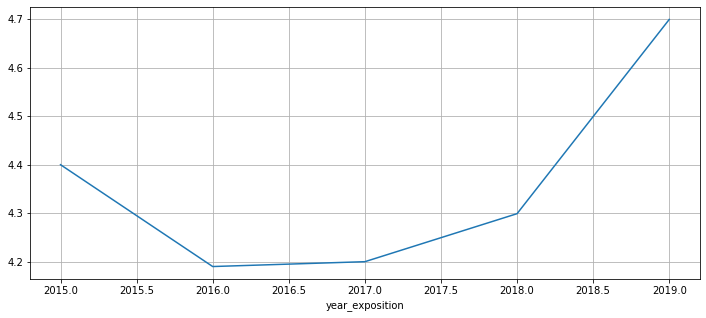

In [145]:
plt.figure()
flats.groupby('year_exposition')['last_price'].median().plot(x='year_exposition', y='last_price', grid=True, figsize=(12,5))

Посмотрим на коэффициент корреляции:

In [146]:
flats['last_price'].corr(flats['year_exposition'])

0.0099700874174865

In [147]:
list_corr_year = []
for i in list(flats['year_exposition'].unique()):
    corr_year = flats.query('year_exposition == @i')
    print(i)
    list_corr_year.append(corr_year['last_price'].corr(corr_year['year_exposition']))
print(list_corr_year)

corr_year = flats.query('year_exposition == 2016')
print(corr_year['last_price'].corr(corr_year['year_exposition']))

2018
2017
2016
2015
2019
[nan, nan, nan, nan, nan]
nan


Коэффициент корреляции опять слишком мал. Снова вывод о сложной зависимости.

С 15-го по 16-ый год цены падали. С 16-го по 17-ый незначительный рост. С 17 по 18 рост усилился. После 18 идёт очень сильный рост.

#### Выберем 10 населённых пунктов с наибольшим числом обёявлений

In [148]:
flats_locality_name = flats.groupby('locality_name').count()
flats_sorted_locality_name = flats_locality_name.sort_values(by='total_images', ascending = False)
flats_sorted_locality_name.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday_exposition,month_exposition,year_exposition,floor_category,living_total_area,kitchen_total_area
locality_name,,,,,,,,,,,,,,,,,,,,,
Санкт-Петербург,8182,8182,8182,8182,8182,8182,8182,8182,8182,8182,...,8182,8182,8182,8182,8182,8182,8182,8182,8182,8182
Мурино,395,395,395,395,395,395,395,395,395,395,...,395,395,395,395,395,395,395,395,395,395
Кудрово,315,315,315,315,315,315,315,315,315,315,...,315,315,315,315,315,315,315,315,315,315
Шушары,312,312,312,312,312,312,312,312,312,312,...,312,312,312,312,312,312,312,312,312,312
Всеволожск,260,260,260,260,260,260,260,260,260,260,...,260,260,260,260,260,260,260,260,260,260
Парголово,229,229,229,229,229,229,229,229,229,229,...,229,229,229,229,229,229,229,229,229,229
Колпино,211,211,211,211,211,211,211,211,211,211,...,211,211,211,211,211,211,211,211,211,211
Пушкин,205,205,205,205,205,205,205,205,205,205,...,205,205,205,205,205,205,205,205,205,205
Гатчина,197,197,197,197,197,197,197,197,197,197,...,197,197,197,197,197,197,197,197,197,197


In [149]:
flats_top10_locality_name = flats_locality_name.query('total_images >= 157 ')
flats_top10_locality_name.sort_values(by='total_images', ascending = False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday_exposition,month_exposition,year_exposition,floor_category,living_total_area,kitchen_total_area
locality_name,,,,,,,,,,,,,,,,,,,,,
Санкт-Петербург,8182,8182,8182,8182,8182,8182,8182,8182,8182,8182,...,8182,8182,8182,8182,8182,8182,8182,8182,8182,8182
Мурино,395,395,395,395,395,395,395,395,395,395,...,395,395,395,395,395,395,395,395,395,395
Кудрово,315,315,315,315,315,315,315,315,315,315,...,315,315,315,315,315,315,315,315,315,315
Шушары,312,312,312,312,312,312,312,312,312,312,...,312,312,312,312,312,312,312,312,312,312
Всеволожск,260,260,260,260,260,260,260,260,260,260,...,260,260,260,260,260,260,260,260,260,260
Парголово,229,229,229,229,229,229,229,229,229,229,...,229,229,229,229,229,229,229,229,229,229
Колпино,211,211,211,211,211,211,211,211,211,211,...,211,211,211,211,211,211,211,211,211,211
Пушкин,205,205,205,205,205,205,205,205,205,205,...,205,205,205,205,205,205,205,205,205,205
Гатчина,197,197,197,197,197,197,197,197,197,197,...,197,197,197,197,197,197,197,197,197,197


Посчитаем среднюю цену квадратного метра в этих населённых пунктах:

In [150]:
indexes = list(flats_top10_locality_name.index)

In [151]:
list_price_metr = {}
for i in indexes:
    mean = flats.query('locality_name == @i')['price_metr'].mean()
    list_price_metr[i] = mean
    print('{}: {:.0f} рублей за метр.'.format(i, mean))

Всеволожск: 67000 рублей за метр.
Выборг: 56422 рублей за метр.
Гатчина: 67757 рублей за метр.
Колпино: 74217 рублей за метр.
Кудрово: 94457 рублей за метр.
Мурино: 85553 рублей за метр.
Парголово: 89048 рублей за метр.
Пушкин: 98382 рублей за метр.
Санкт-Петербург: 103919 рублей за метр.
Шушары: 77978 рублей за метр.


Населённые пункты с самой высокой стоимостью жилья:

In [152]:
maximum = {key:values for key, values in list_price_metr.items() if values == max(list_price_metr.values())}
maximum

{'Санкт-Петербург': 103919.03886580298}

Населённые пункты с самой низкой  стоимостью жилья:

In [153]:
minimum = {key:values for key, values in list_price_metr.items() if values == min(list_price_metr.values())}
minimum

{'Выборг': 56421.732484076434}

#### Выясним, какая область входит в центр:

Создадим столбец с расстоянием до центра в километрах и округлим его:

In [154]:
flats['cityCenters_nearest_km'] = flats['cityCenters_nearest'] / 1000

In [155]:
flats['cityCenters_nearest_km'] = flats['cityCenters_nearest_km'].astype('int')

Посчитаум среднюю цену для каждого километра. 

In [156]:
flats['price_km_cityCenters_nearest'] = flats['last_price'] / flats['cityCenters_nearest_km']

Выделим квартиры в Санкт-Петербурге:

In [157]:
flats_spb = flats.query('locality_name == "Санкт-Петербург"')

In [158]:
flats_cityCenters_nearest_km = flats_spb.pivot_table(index='cityCenters_nearest_km', values='price_km_cityCenters_nearest')
flats_cityCenters_nearest_km = flats_cityCenters_nearest_km.query('cityCenters_nearest_km != 0')

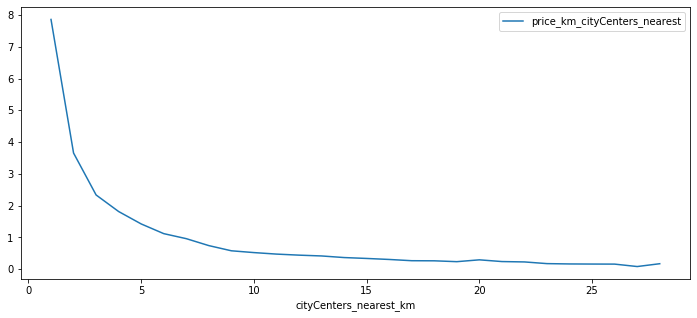

In [159]:
flats_cityCenters_nearest_km.plot(figsize=(12, 5))

Центральная зона начинается с 2 километров.  
Выделим сегмент в центре для изучения параметров:  
площадь, цена, число комнат, высота потолков

In [160]:
flats_centers_spb = flats.query('cityCenters_nearest_km <= 2 and cityCenters_nearest_km != 0')

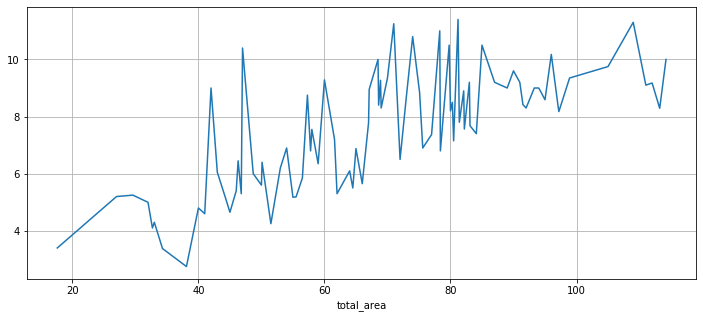

In [161]:
plt.figure()
flats_centers_spb.groupby('total_area')['last_price'].median().plot(x='total_area', y='last_price', grid=True, figsize=(12,5))

Рассмотрим коэффициент корреляции:

In [162]:
flats_centers_spb['last_price'].corr(flats_centers_spb['total_area'])

0.7023190847382296

Коэффициенть корреляции говорит о выраженной положительной зависимости.

Виден общий рост цены с увеличением площади.

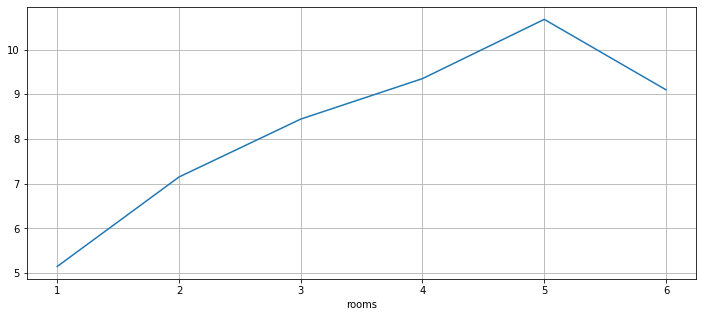

In [163]:
plt.figure()
flats_centers_spb.groupby('rooms')['last_price'].median().plot(x='rooms', y='last_price', grid=True, figsize=(12,5))

Рассмотрим коэффициент корреляции:

In [164]:
flats_centers_spb['last_price'].corr(flats_centers_spb['rooms'])

0.5995275149231647

Коэффициент говорит о достаточно сильной положительной зависимости.

До 5-и комнат цена растёт, после начинает снижатся.

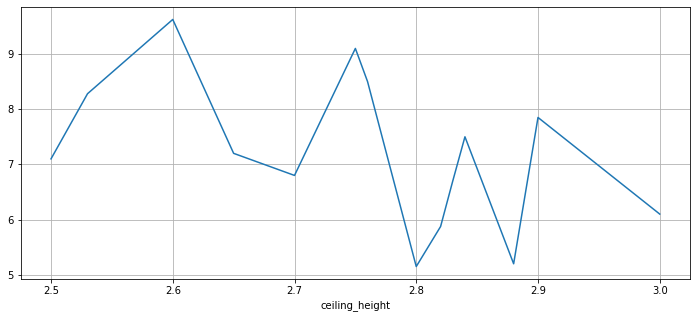

In [165]:
plt.figure()
flats_centers_spb.groupby('ceiling_height')['last_price'].median().plot(x='ceiling_height', y='last_price', grid=True, figsize=(12,5))

Рассмотрим коэффициент корреляции:

In [166]:
flats_centers_spb['last_price'].corr(flats_centers_spb['ceiling_height'])

-0.17868948610624272

Покоэффициенту видно, присутсвие слабой отрицательной зависимости, т.е. чем выше цена - тем ниже потолок. Очень странно.

Квартиры с высотой потолков 2.6 метров стоят дороже. График показывает несвязные вещи.

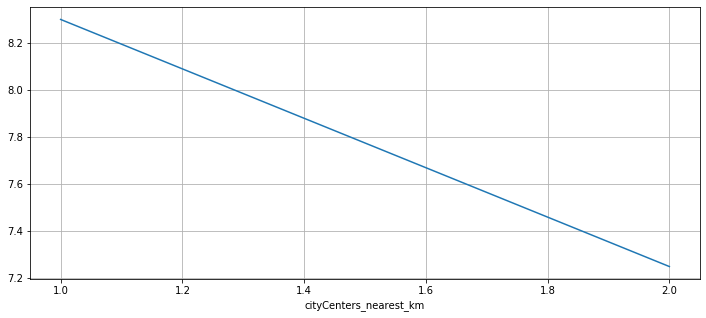

In [167]:
plt.figure()
flats_centers_spb.groupby('cityCenters_nearest_km')['last_price'].median().plot(x='cityCenters_nearest_km', y='last_price', grid=True, figsize=(12,5))

Рассмотрим коэффициент корреляции:

In [168]:
flats_centers_spb['last_price'].corr(flats_centers_spb['cityCenters_nearest_km'])

-0.13040702055248243

По коэффициенту видна слабая отрицательная зависимость - чем больше цена - тем меньше расстояние. Это совпадает с графиком.

С увеличением расстояния от центра, цена падает.

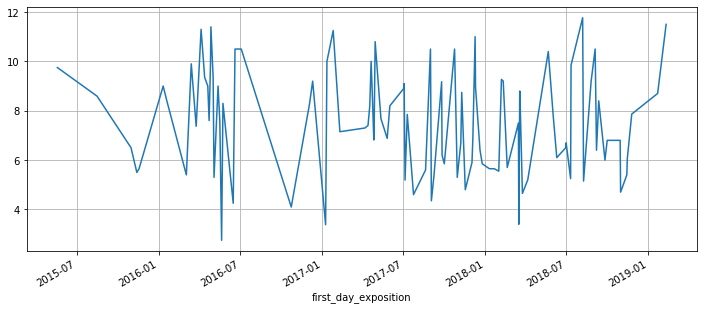

In [169]:
plt.figure()
flats_centers_spb.groupby('first_day_exposition')['last_price'].median().plot(x='first_day_exposition', y='last_price', grid=True, figsize=(12,5))

Рассмотрим коэффициент корреляции:

In [170]:
flats_centers_spb['last_price'].corr(flats_centers_spb['year_exposition'])

-0.10039678598229225

Коэффициент говорит об очень слабой отрицательнеой зависимости.

По графику видно, что цена не зависит от даты(года) объявления.

Выводы по центру СПБ отличаются от общих.

Выводы по площади совпадают - чем больше площадь - тем больше цена.  
Выводы по колличеству комнат тоже совпадают, т.к. число 6-и комнатных квартир слишком мало.  
В общих выводах, в 15-ом и 16-ом гогоду были просадки по цене, здесь этого не наблюдается.

### Шаг 5. Общий вывод

Были проанализированы данные по стоимости квартир. В исходных данных присутсвуют ошибки, пропуски, некорректные величины. Были заполнены пропуски, переименованы названия населённых пунктов, изменены типы данных, добавлены новые столбцы для удобства восприятия и анализа. Проведено исследование влияния площади, высоты потолков, количества комнат, даты объявления на цены квартир всех представленных населённых пунктов и центра Санкт-Петербурга. Выводы по всем населённым пунктам и центра СПБ цастично совпадают, кроме даты объявления.